In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
baseline = pd.read_csv("build/benchmarks/results/baseline.csv")
mean_baseline = np.median(baseline.time_ns) / np.median(baseline.iterations)

In [10]:
df = pd.read_csv("build/benchmarks/results/first.csv")
df

ecc_ind  anom_ind  eccentricity  mean_anomaly  true_eccentric_anomaly  \
0 0    0.071429  0.071429      0.071429      0.023338                0.025133   
  1    0.071429  0.071429      0.071429      0.070018                0.075398   
  2    0.071429  0.071429      0.071429      0.116711                0.125664   
  3    0.071429  0.071429      0.071429      0.163428                0.175929   
  4    0.071429  0.071429      0.071429      0.210175                0.226195   
...         ...       ...           ...           ...                     ...   
6 120  0.928571  0.928571      0.928571      6.265242                6.056991   
  121  0.928571  0.928571      0.928571      6.269778                6.107256   
  122  0.928571  0.928571      0.928571      6.273902                6.157522   
  123  0.928571  0.928571      0.928571      6.277733                6.207787   
  124  0.928571  0.928571      0.928571      6.281388                6.258053   

       computed_sin  computed_cos     error_sin     error_cos  iterations  \
0 0        0.025130      0.999684  7.133183e-14  1.776357e-15        5000   
  1        0.075327      0.997159  5.022371e-13  3.796963e-14        5000   
  2        0.125333      0.992115  1.287859e-12  1.627587e-13        5000   
  3        0.175023      0.984564  2.249034e-12  3.997913e-13        5000   
  4        0.224271      0.974527  3.157336e-12  7.265299e-13        5000   
...             ...           ...           ...           ...         ...   
6 120     -0.224271      0.974527  5.275645e-10  1.214100e-10        5000   
  121     -0.175023      0.984564  1.628787e-09  2.895447e-10        5000   
  122     -0.125333      0.992115  2.624165e-09  3.315092e-10        5000   
  123     -0.075327      0.997159  1.647364e-09  1.244442e-10        5000   
  124     -0.025130      0.999684  1.298480e-10  3.264056e-12        5000   

       time_ns  
0 0     375309  
  1     503490  
  2     429994  
  3     358590  
  4     358934  
...        ...  
6 120  1111440  
  121  1142725  
  122  1112040  
  123  1284552  
  124  1192094  

[875 rows x 11 columns]

Text(0, 0.5, 'time per epoch [ns]')

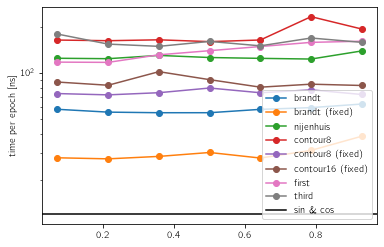

In [15]:
for name in ["brandt", "brandt_fixed", "nijenhuis", "contour8", "contour8_fixed", "contour16_fixed", "first", "third"]:
    df = pd.read_csv(f"build/benchmarks/results/{name}.csv")
    df_ecc = df.mean(level=0)
    plt.plot(df_ecc.eccentricity, df_ecc.time_ns.astype(np.float64) / df_ecc.iterations, "o-", label=name.replace("_fixed", " (fixed)"))
    
plt.axhline(mean_baseline, color="k", label="sin \& cos")
plt.yscale("log")
plt.legend()
plt.ylabel("time per epoch [ns]")

0
0
0
0
0
0


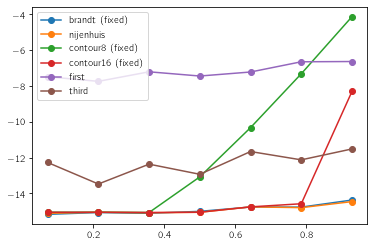

In [16]:
for name in ["brandt_fixed", "nijenhuis", "contour8_fixed", "contour16_fixed", "first", "third"]:
    df = pd.read_csv(f"build/benchmarks/results/{name}.csv")
    df_ecc = df.max(level=0)
    plt.plot(df_ecc.eccentricity, np.log10(df_ecc.error_sin), "o-", label=name.replace("_fixed", " (fixed)"))

plt.legend()